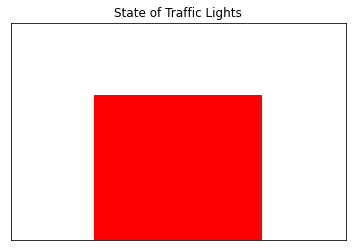

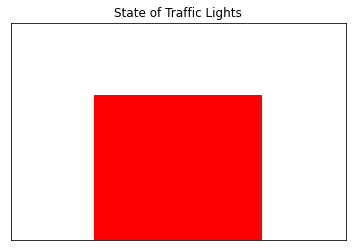

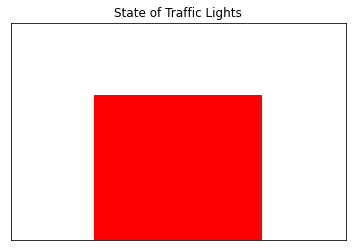

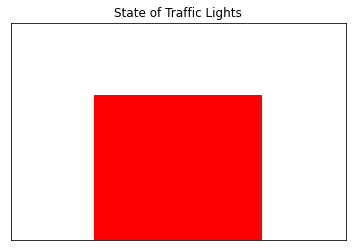

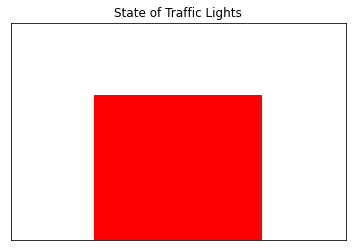

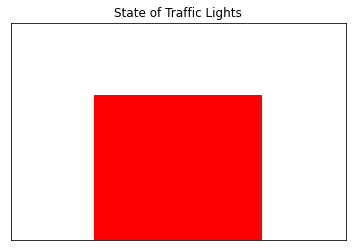

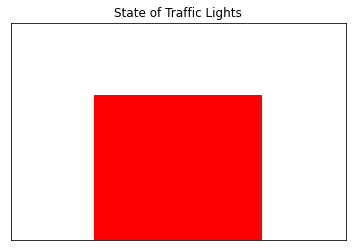

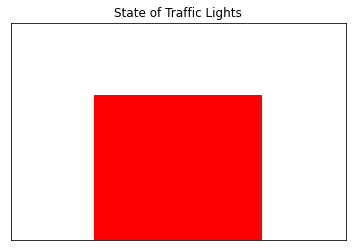

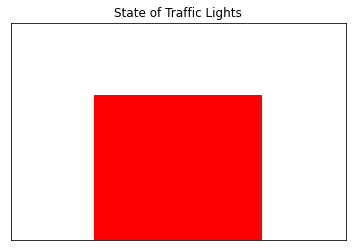

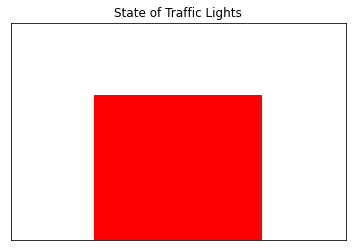

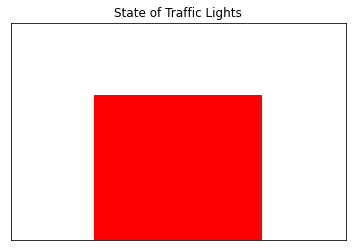

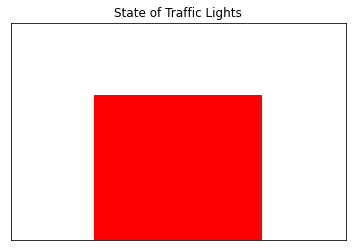

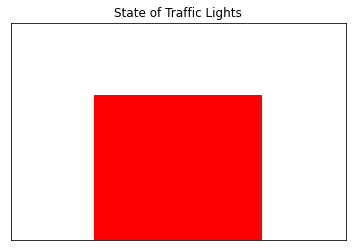

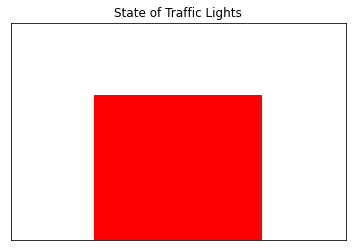

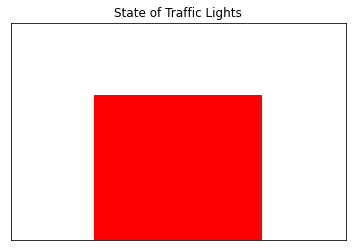

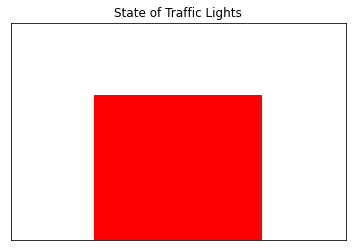

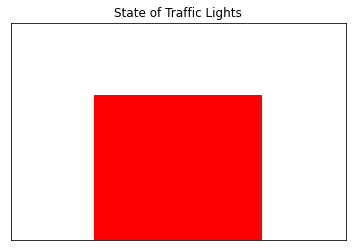

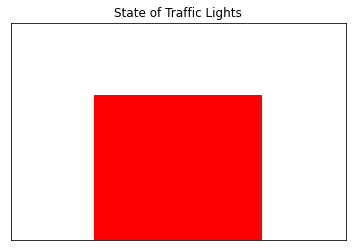

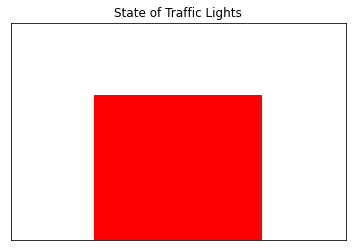

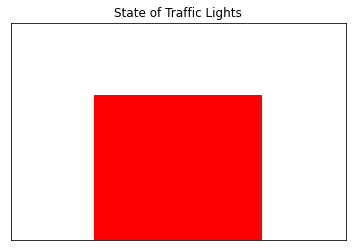

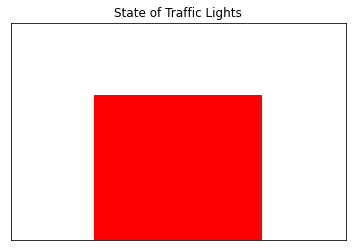

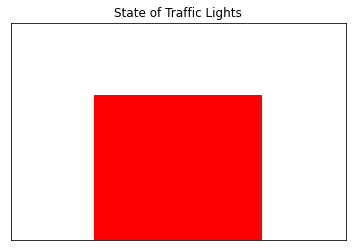

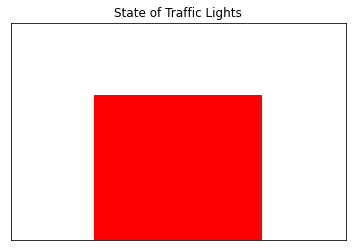

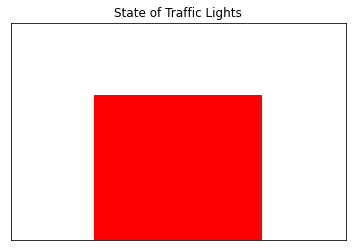

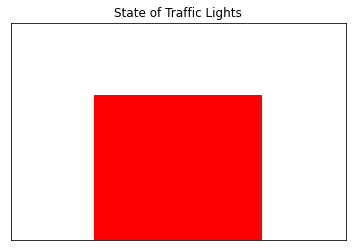

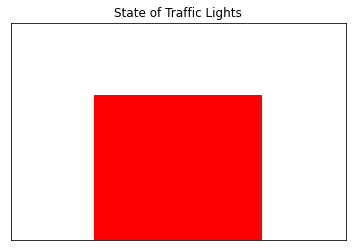

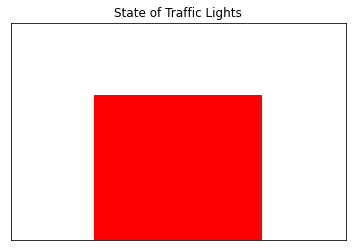

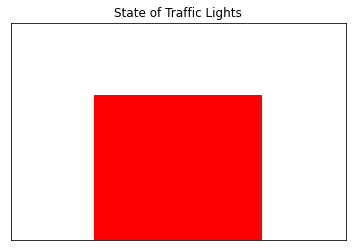

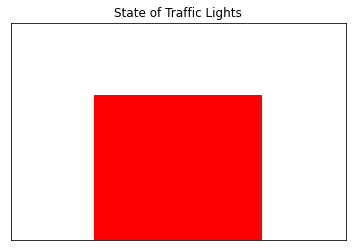

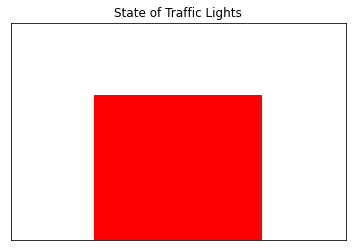

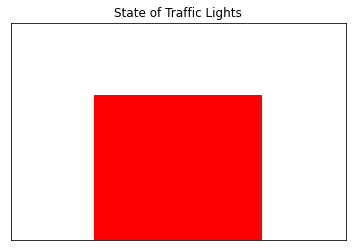

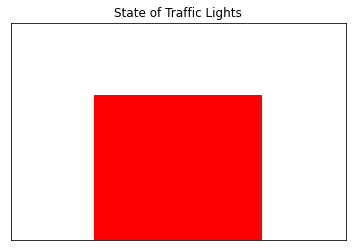

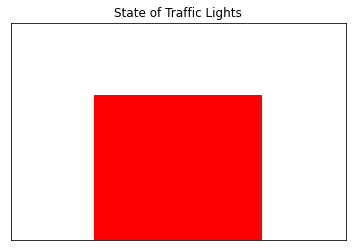

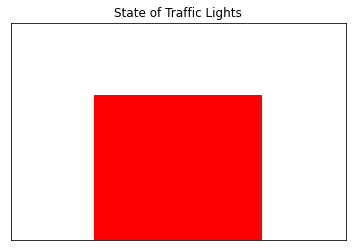

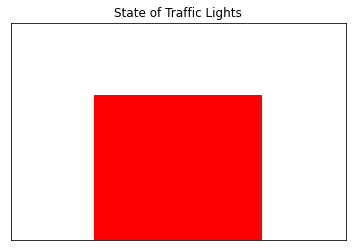

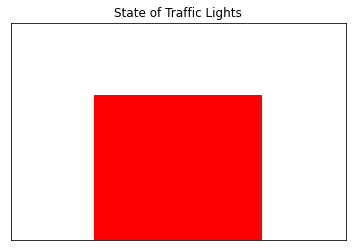

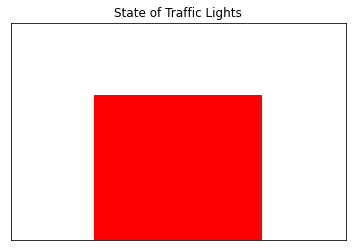

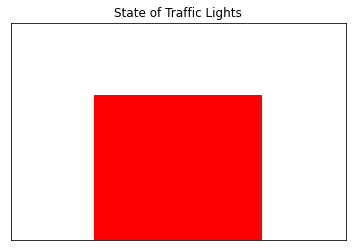

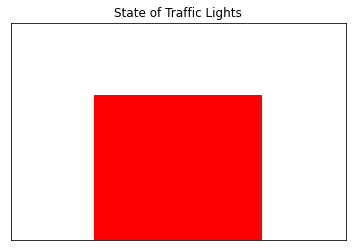

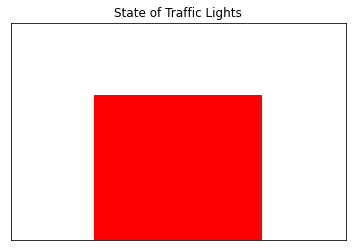

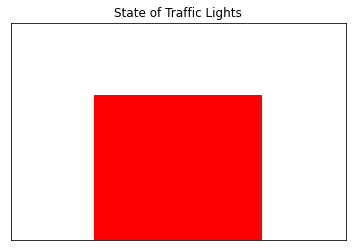

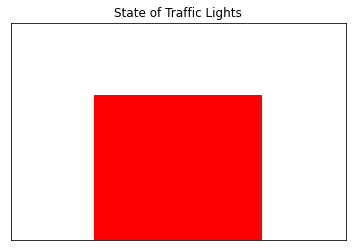

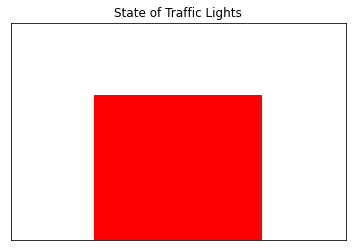

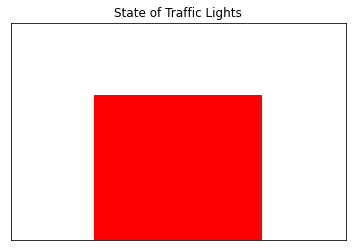

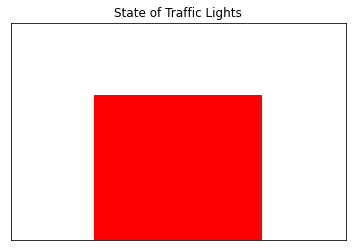

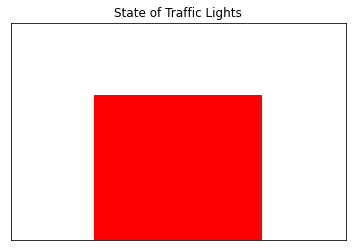

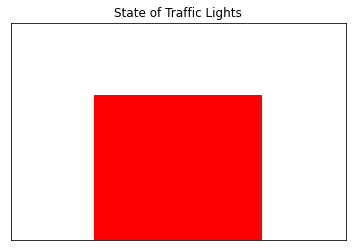

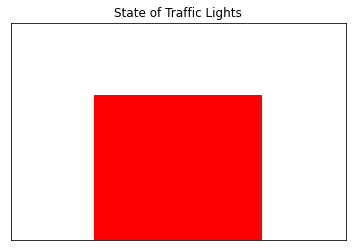

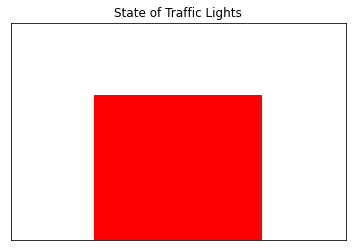

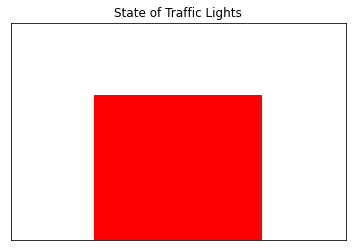

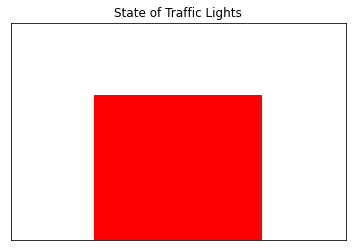

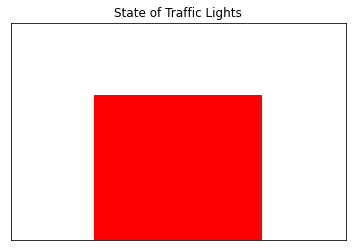

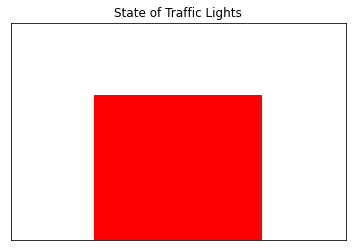

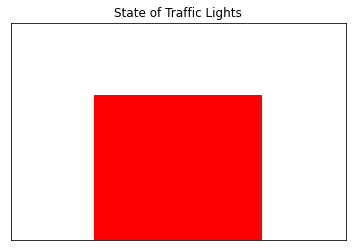

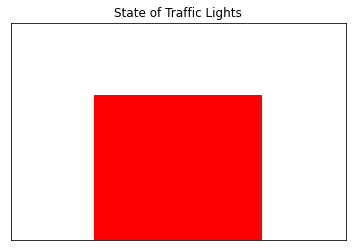

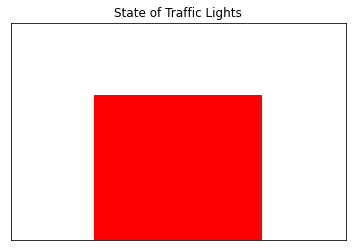

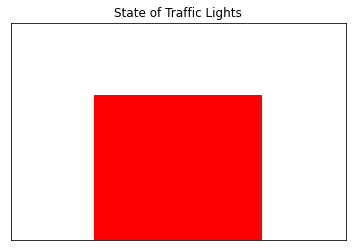

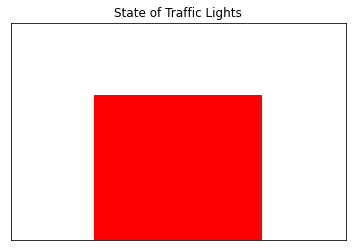

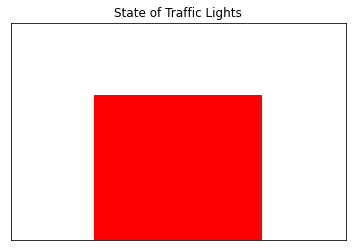

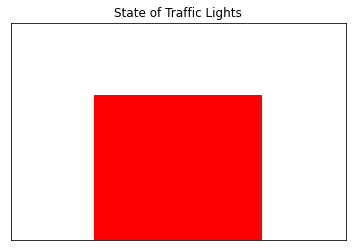

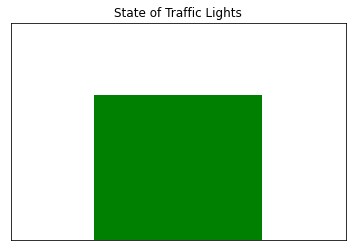

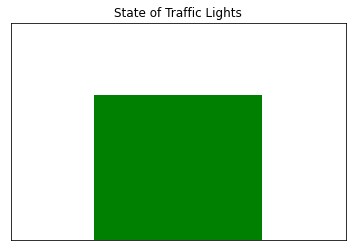

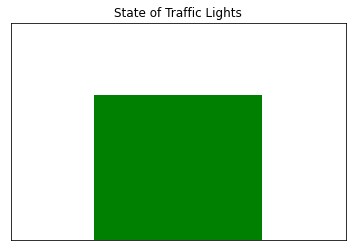

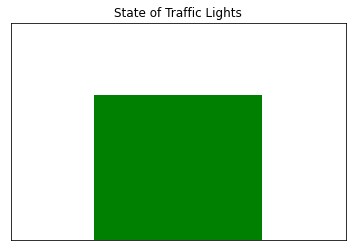

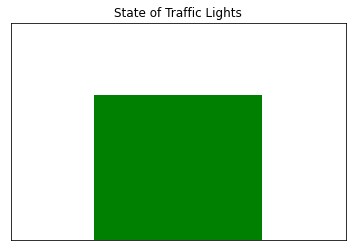

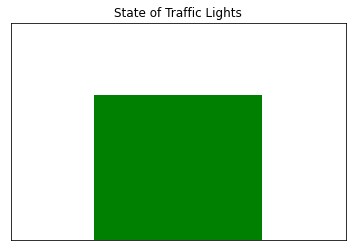

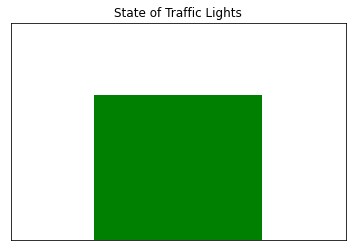

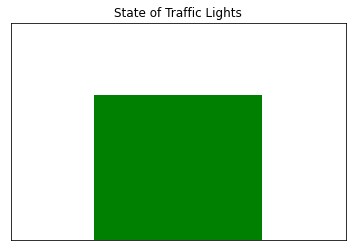

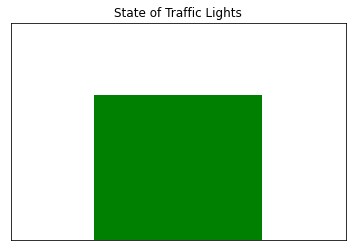

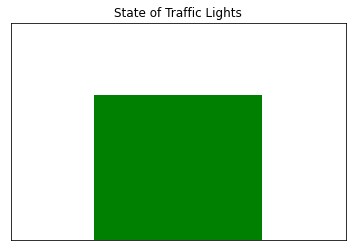

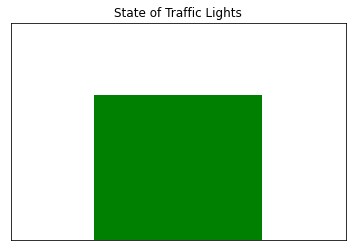

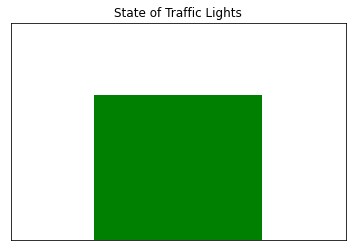

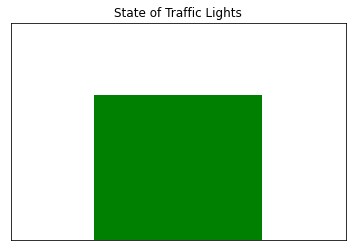

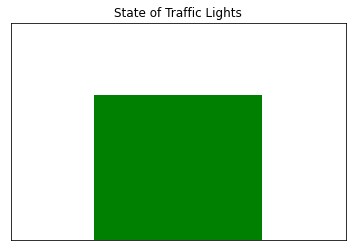

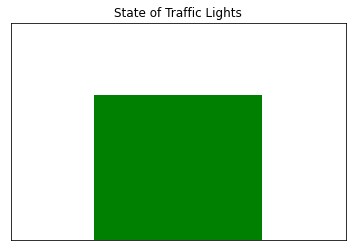

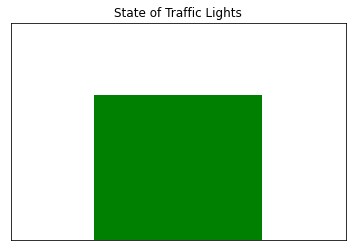

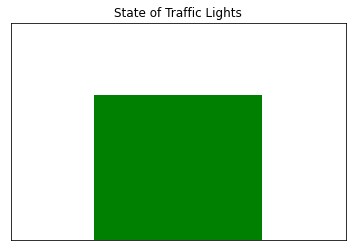

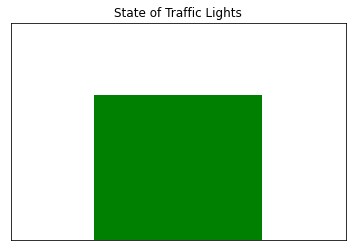

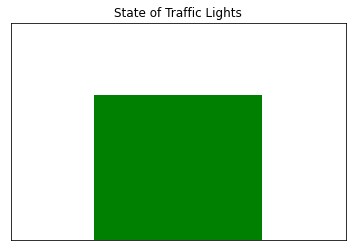

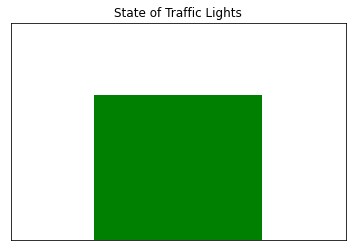

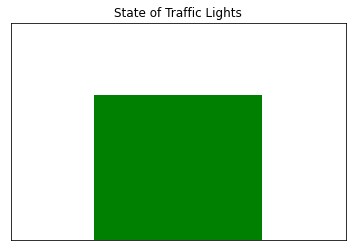

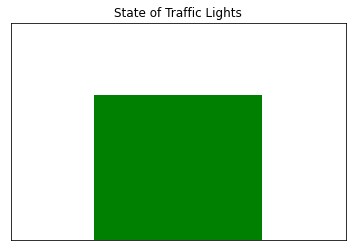

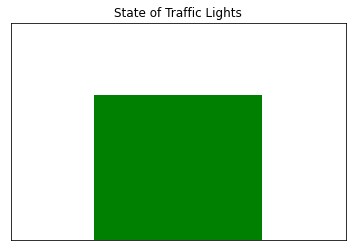

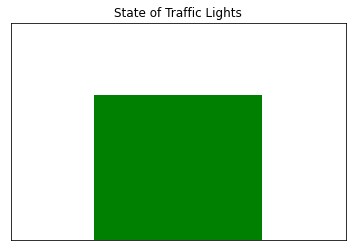

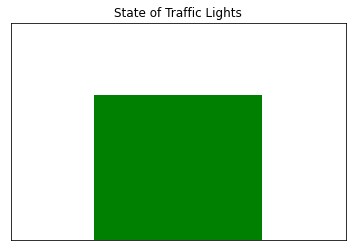

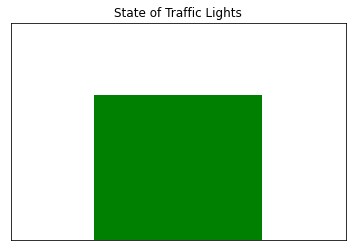

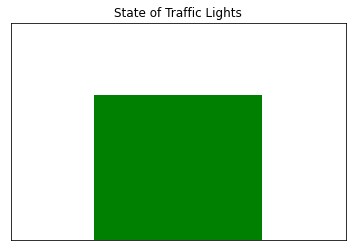

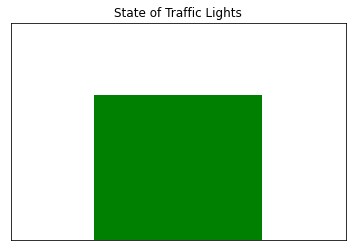

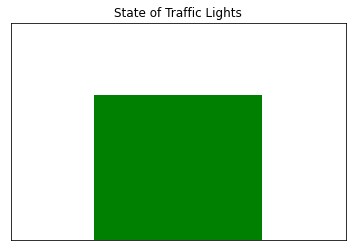

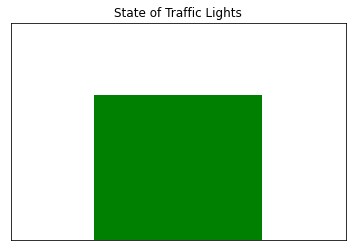

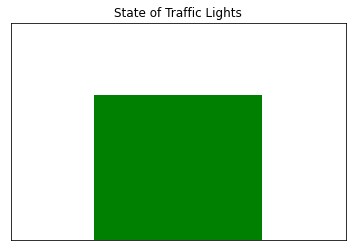

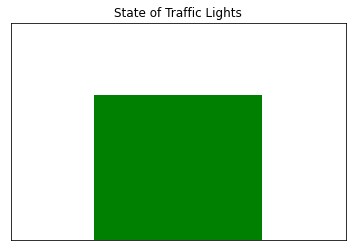

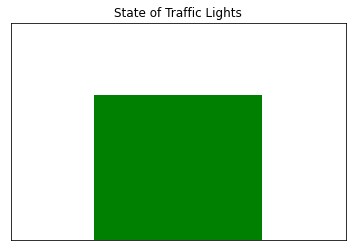

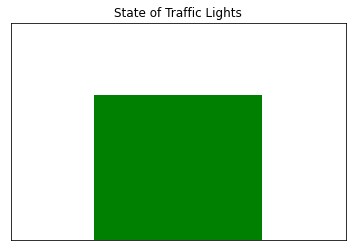

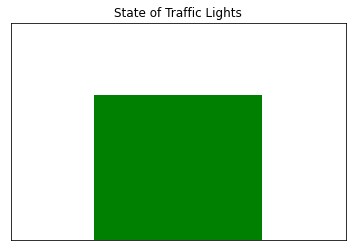

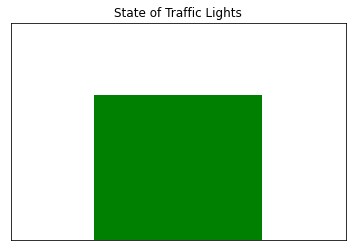

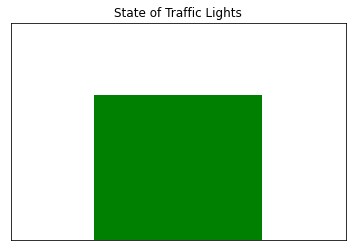

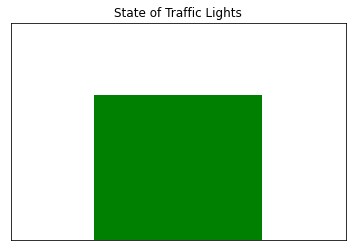

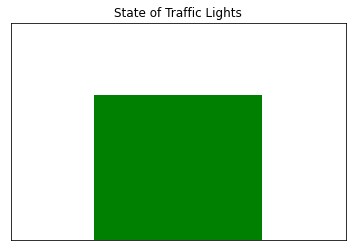

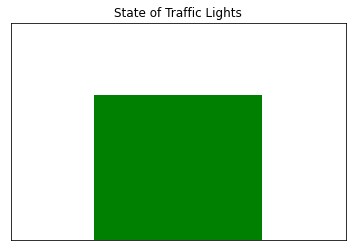

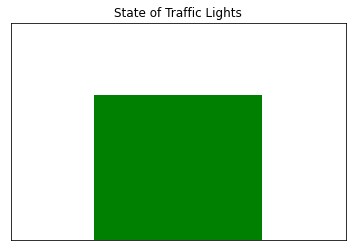

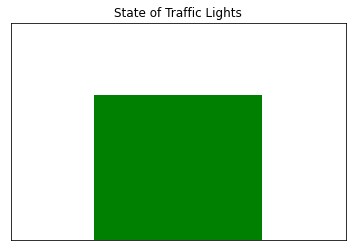

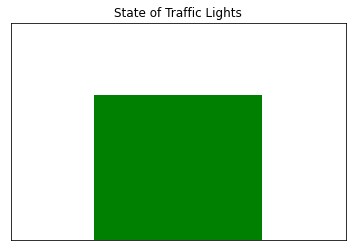

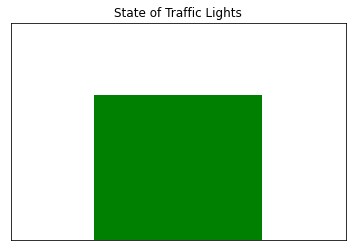

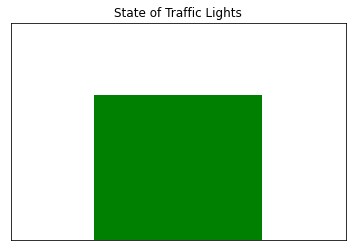

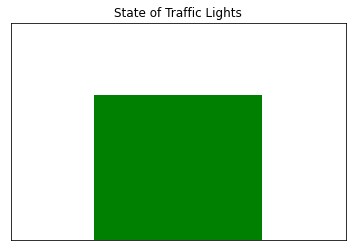

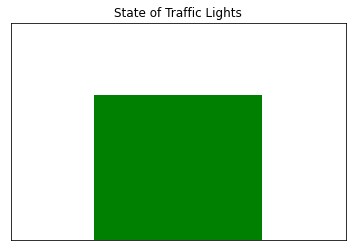

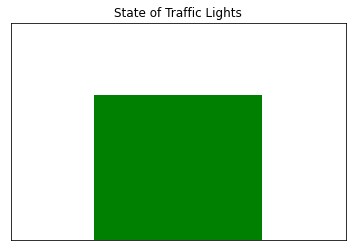

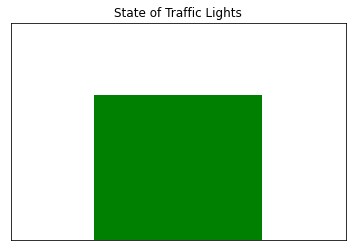

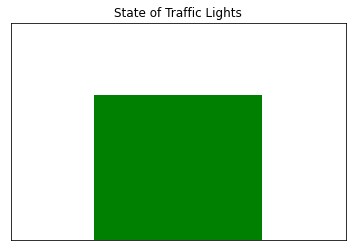

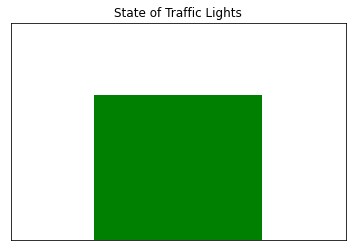

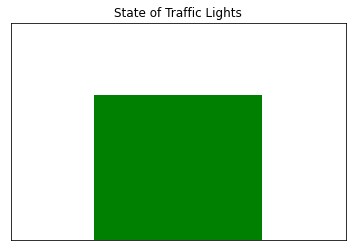

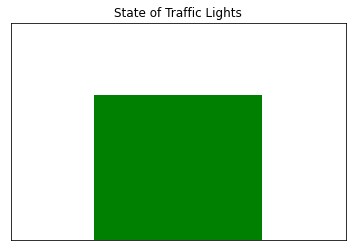

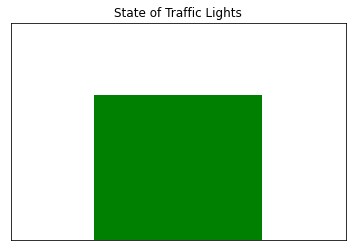

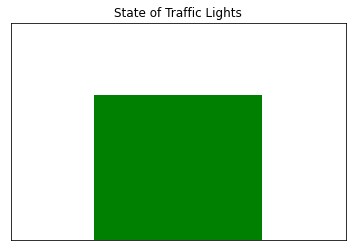

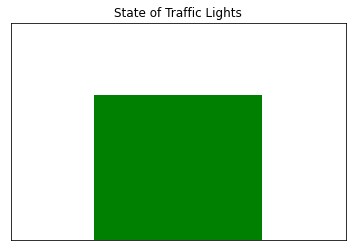

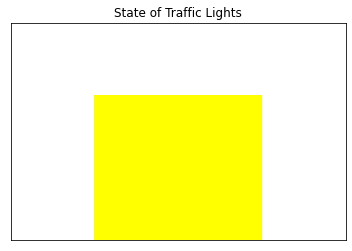

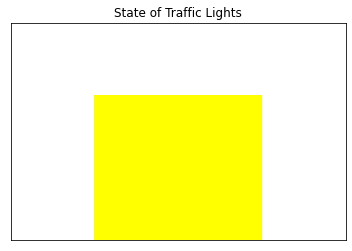

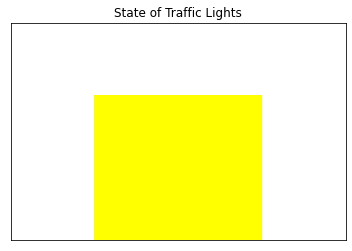

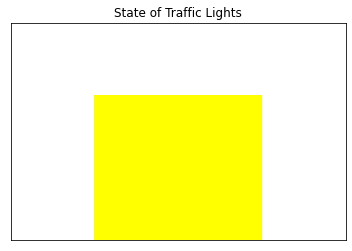

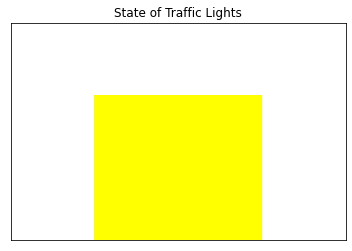

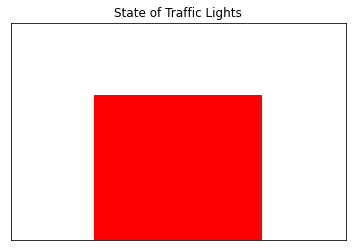

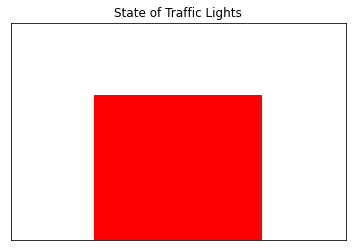

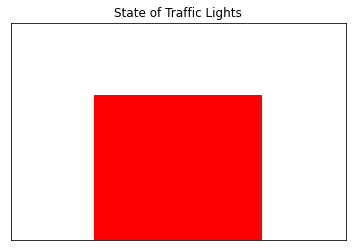

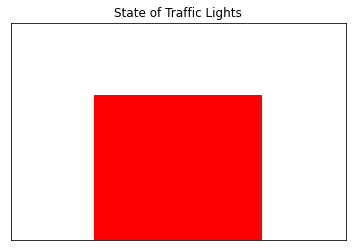

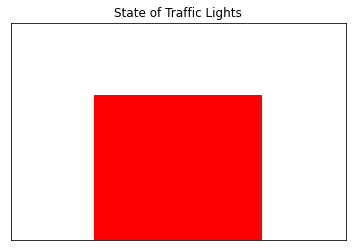

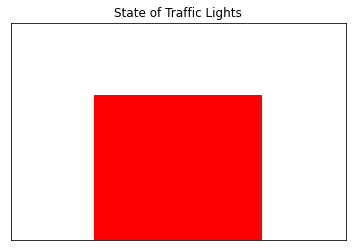

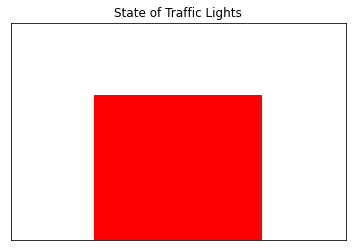

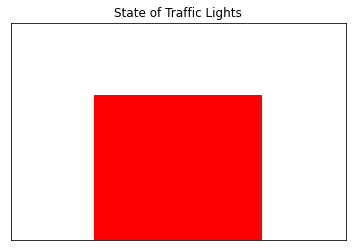

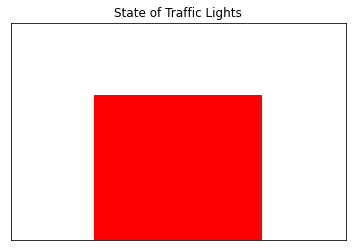

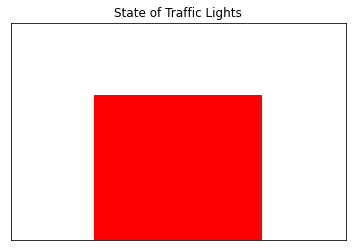

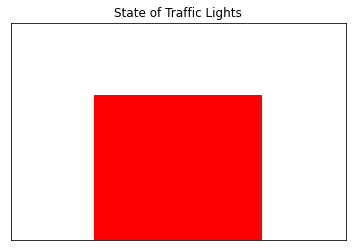

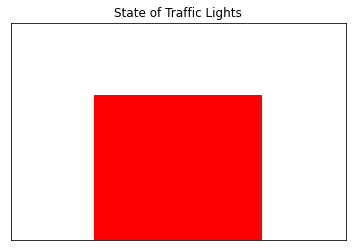

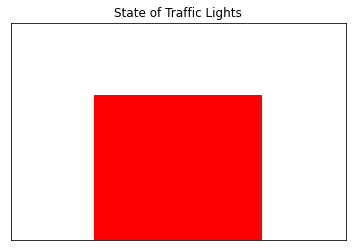

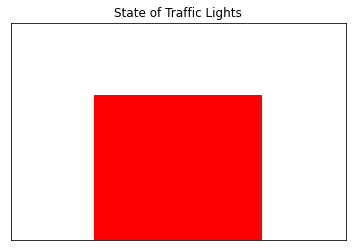

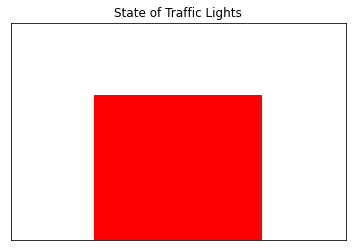

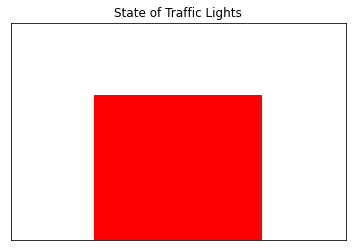

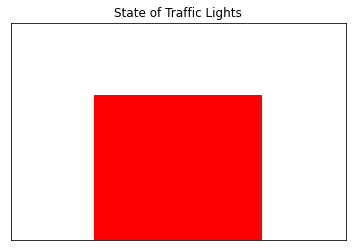

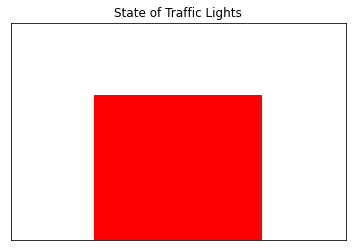

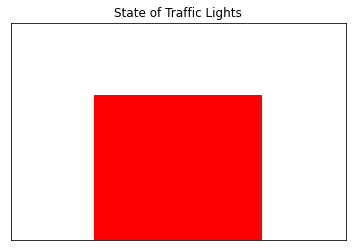

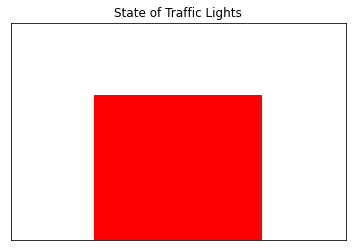

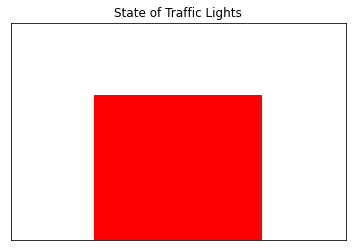

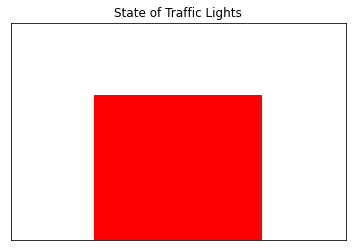

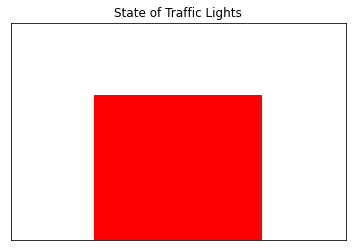

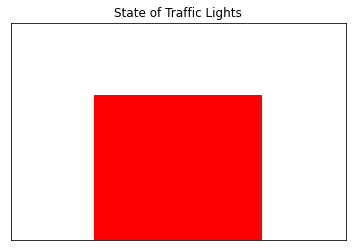

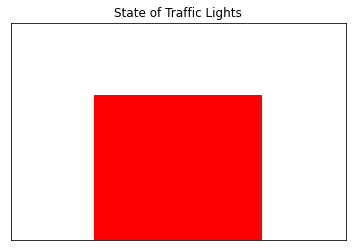

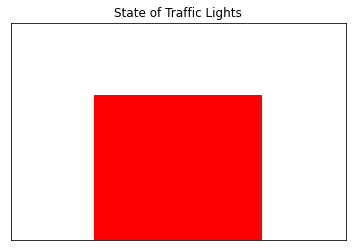

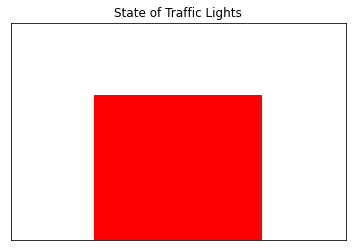

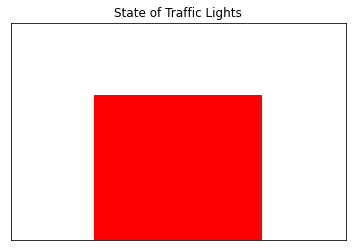

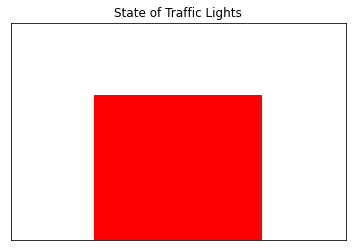

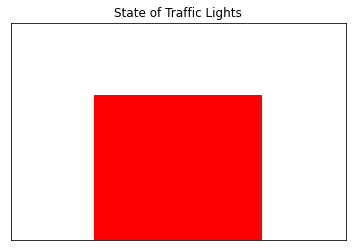

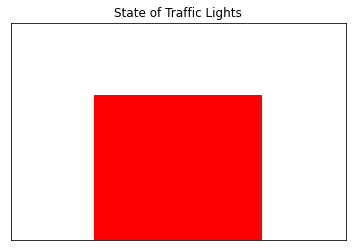

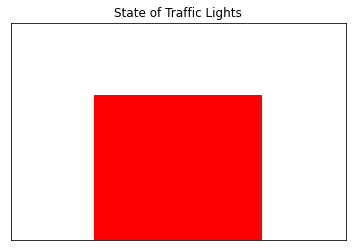

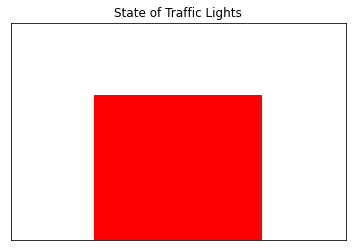

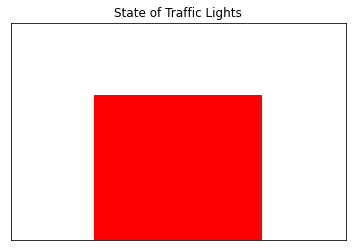

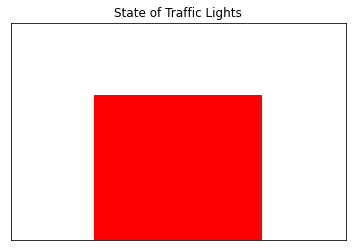

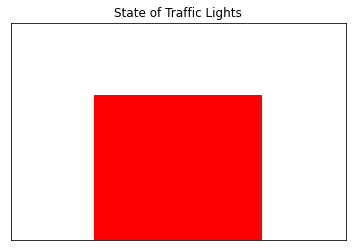

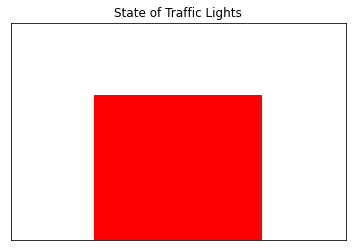

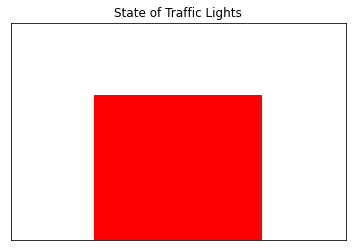

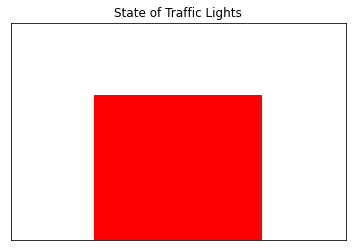

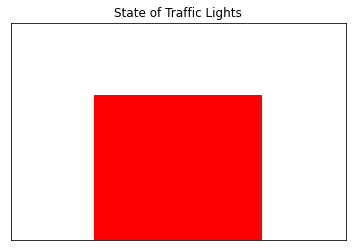

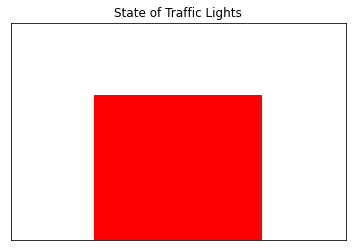

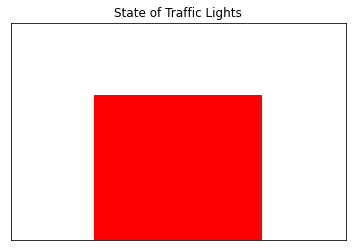

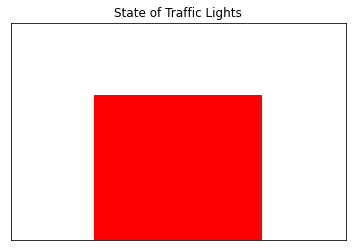

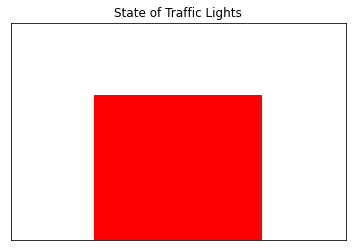

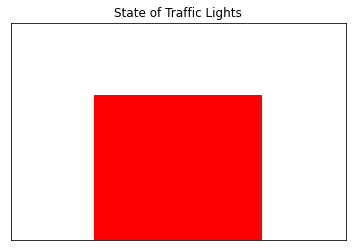

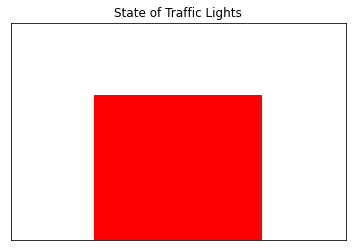

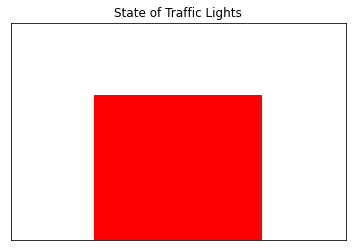

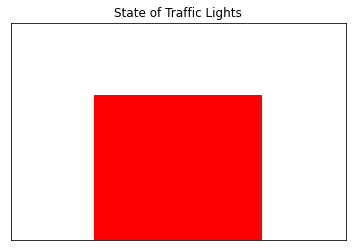

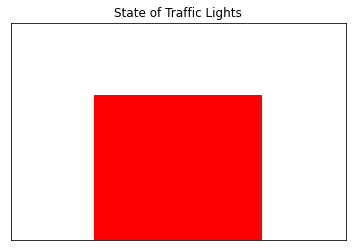

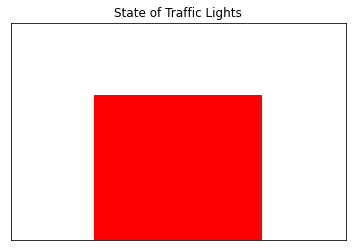

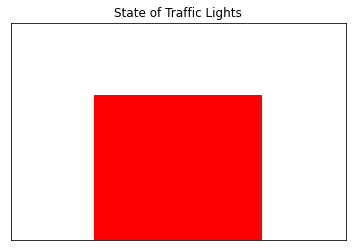

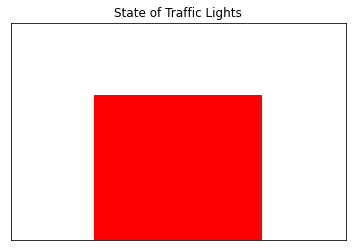

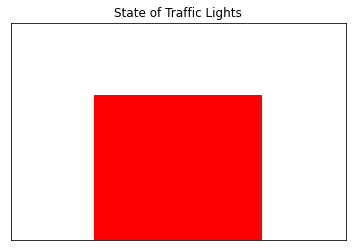

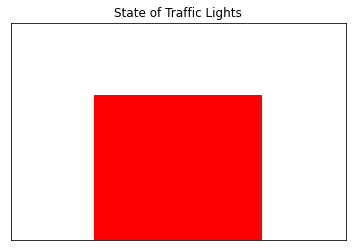

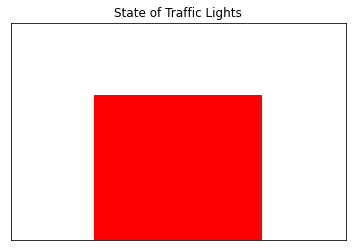

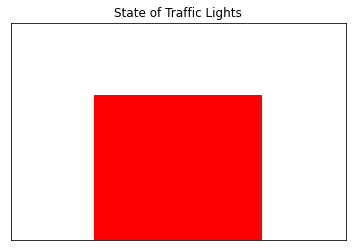

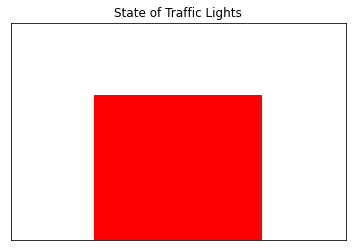

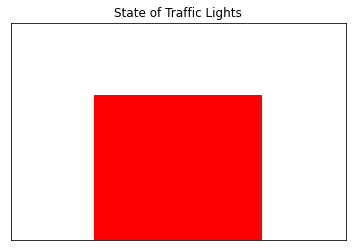

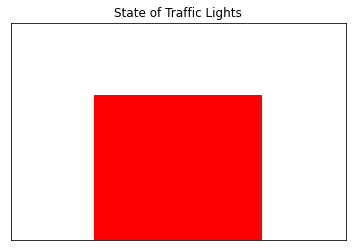

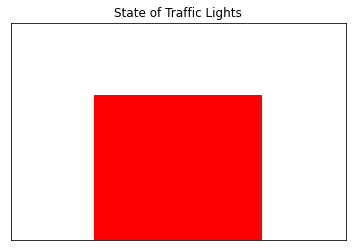

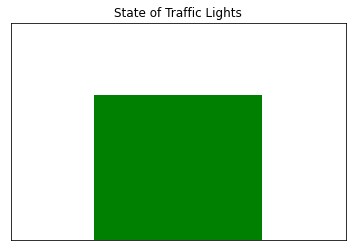

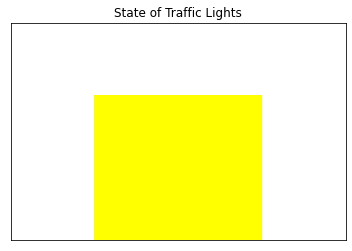

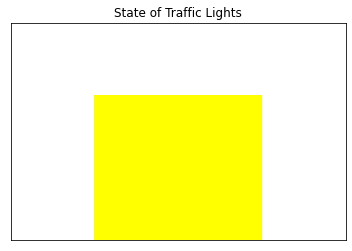

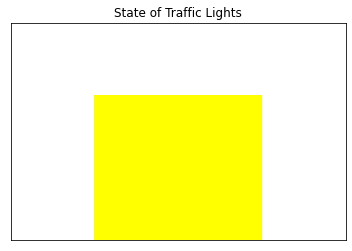

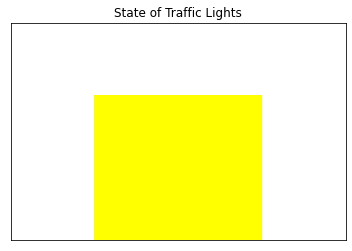

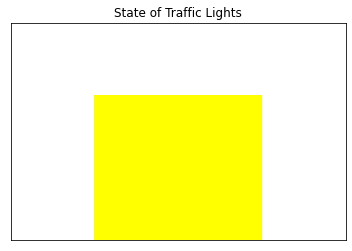

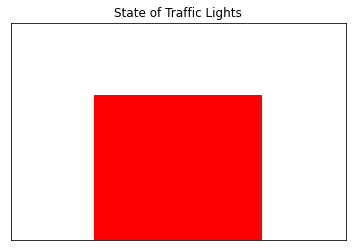

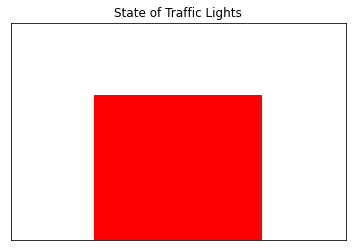

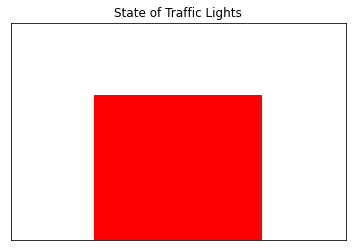

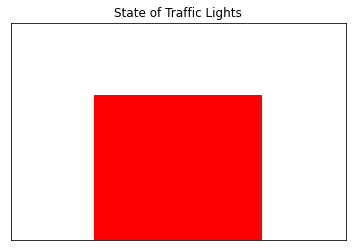

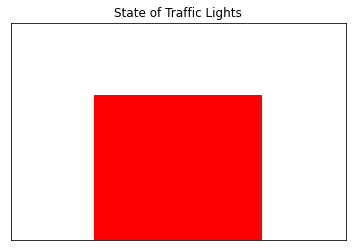

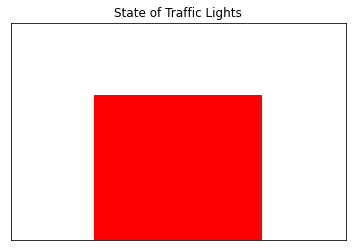

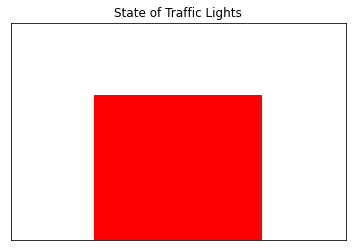

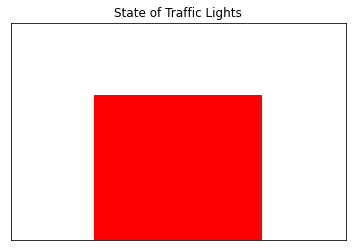

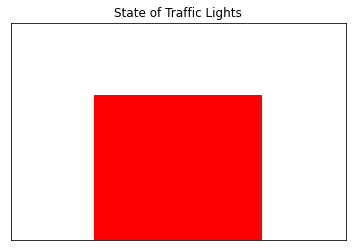

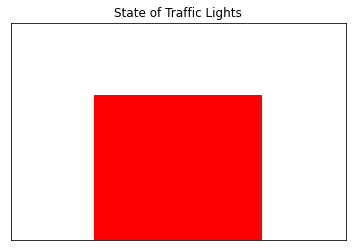

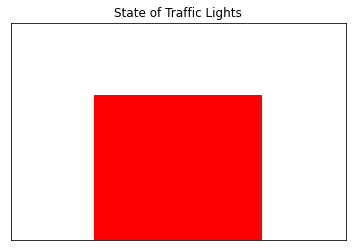

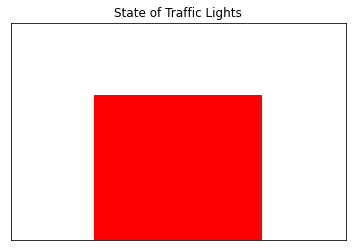

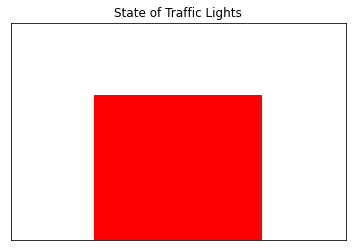

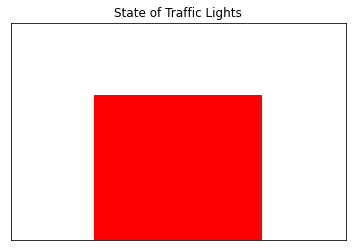

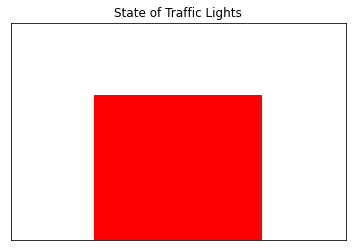

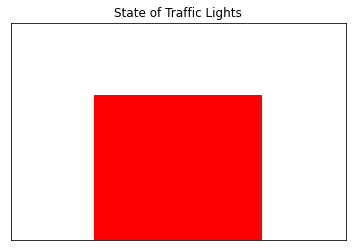

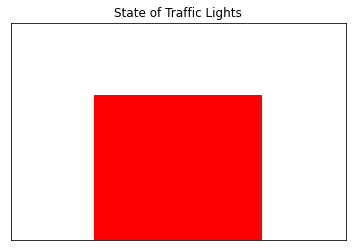

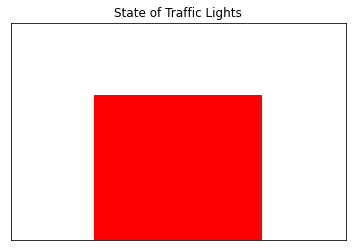

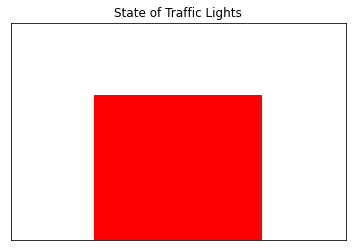

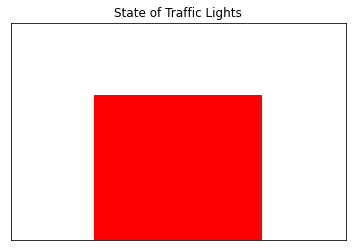

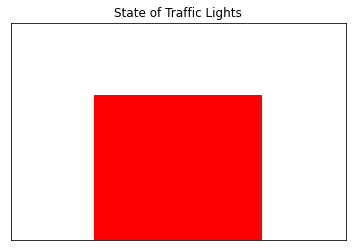

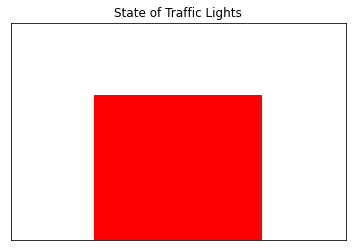

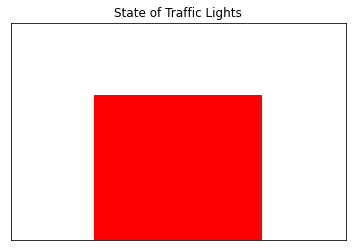

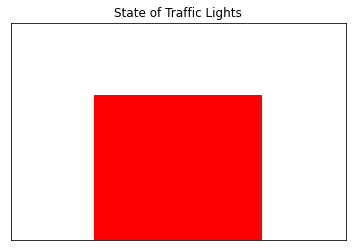

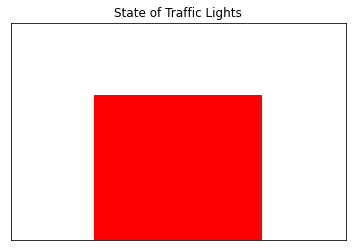

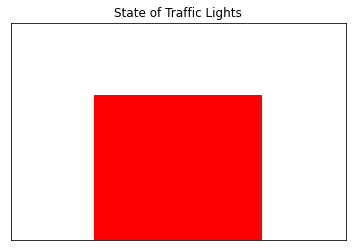

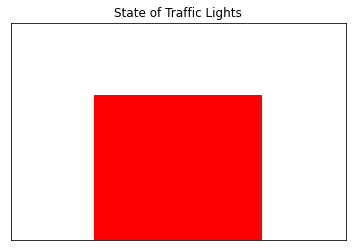

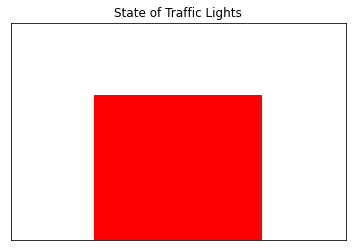

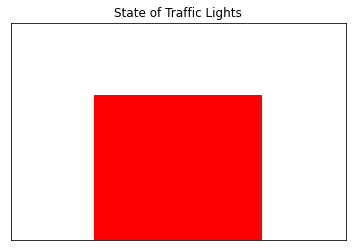

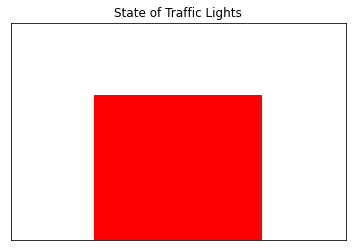

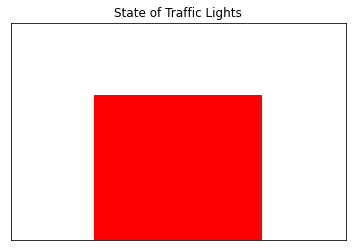

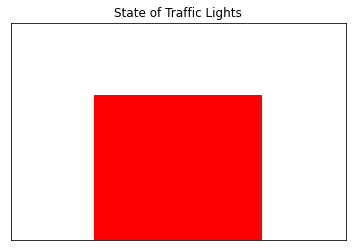

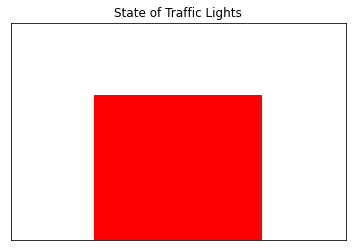

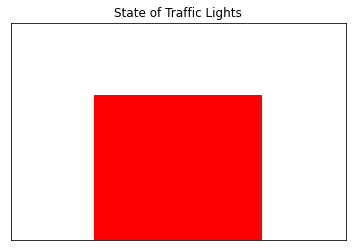

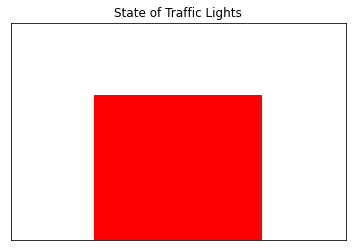

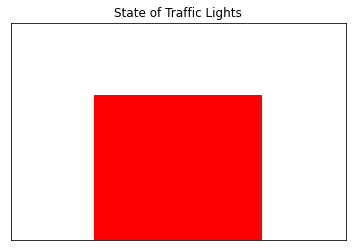

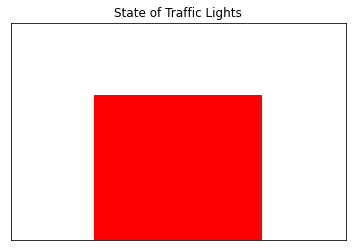

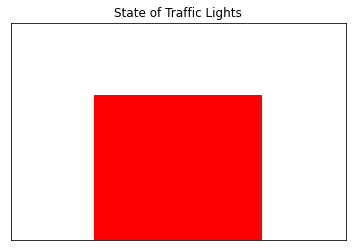

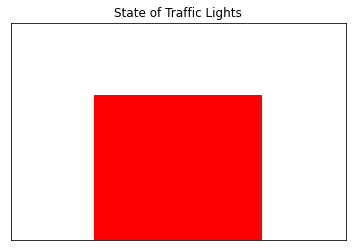

In [ ]:
#libraries 
import time
import matplotlib.pyplot as plt

# Initialize state machine
state = 'RED'
count = 0

# Initialize simulationulation parameters
simulation_time = 360
step_size = 1
time_axis = []
state_axis = []

# Define state function
def state_machine(state, count, pedestrian_present):
    if state == 'RED':
        if count == 60:
            state = 'GREEN'
            count = 0
    elif state == 'GREEN':
        if pedestrian_present:
            if count >= 60:
                state = 'YELLOW'
                count = 0
            else:
                state = 'PENDING'
        elif count == 60:
            state = 'YELLOW'
            count = 0
    elif state == 'YELLOW':
        if count == 5:
            state = 'RED'
            count = 0
    elif state == 'PENDING':
        if pedestrian_present:
            state = 'YELLOW'
            count = 0
        elif count == 60:
            state = 'RED'
            count = 0
    count += 1
    return state, count

# Run simulationu
for i in range(simulation_time):
    # Simulate pedestrian presence
    pedestrian_present = False
    if i >= 120 and i < 240:
        pedestrian_present = True

    # Run state machine
    state, count = state_machine(state, count, pedestrian_present)

    # Log state and time
    state_axis.append(state)
    time_axis.append(i)

    # Visualize state
    colors = {'RED': 'red', 'GREEN': 'green', 'YELLOW': 'yellow', 'PENDING': 'orange'}
    plt.bar(0, 1, width=1, color=colors[state])
    plt.xlim(-1, 1)
    plt.ylim(0, 1.5)
    plt.xticks([])
    plt.yticks([])
    plt.title('State of Traffic Lights')
    plt.show(block=False)
    plt.pause(step_size)
    plt.clf()

# Plot state over time
plt.plot(time_axis, state_axis)
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.title('State of Traafic Lights')
plt.show()
